## ABS Data Collection Summary
### Use Case
We set out to build a prototype data product that demonstrates how public economic data can be used
to create business-relevant metrics and insights for a specific industry — in this case, the Finance &
Insurance sector (NAICS 52). This prototype is intended to: - Showcase skills in data sourcing,
cleaning, merging, and analysis - Generate insightful, real-world metrics (like productivity or wage
efficiency) - Be a portfolio project or client demo that makes public data more actionable

### Step-by-Step: What We Did with the ABS
1. Selected the ABS (Annual Business Survey) - Source: U.S. Census Bureau API - Provides
company-level microdata on revenue, employment, and ownership demographics
1. Filtered to NAICS 52 – Finance & Insurance - Scoped the analysis to a specific, data-rich industry -
Aligns with BEA and BLS data for deeper economic analysis - High relevance to financial services,
fintech, policy, etc.
1. Accessed ABS Data via Census API (Python Snippet) - Called the ABS 2022 dataset - Filtered for
NAICS sector 52 - Loaded the results into a Pandas DataFrame
1. Inspected & Grouped the Data - Reviewed revenue (`RCPSZFI`), employment (`EMP`), and
ownership group fields - Grouped by revenue size and ownership type (e.g., ethnic group) - Identified
limitations (e.g., some values defaulted to 'Total')

### Next Step in the Pipeline
The ABS data was used as a base layer to join with: - BEA GDP data → to calculate Value Added per
Employee - BLS Wage data (QCEW) → to analyze wage/output efficiency This layered approach
showcases how federal data can be reused and repackaged into actionable, industry-specific business
metrics.

In [2]:
import requests
import pandas as pd

In [3]:
# API endpoint for ABS Company Summary
url = "https://api.census.gov/data/2022/abscs"

In [4]:
# Expanded list of fields to retrieve
params = {
    "get": ",".join([
        "NAICS2022_LABEL",
        "FIRMPDEMP", "RCPPDEMP", "EMP", "PAYANN",
        "EMPSZFI", "RCPSZFI", "YIBSZFI", "URSZFI",
        "EMP_S", "RCPPDEMP_S", "PAYANN_S",
        "SEX_LABEL", "ETH_GROUP", "ETH_GROUP_LABEL", "RACE_GROUP", "RACE_GROUP_LABEL", "VET_GROUP", "VET_GROUP_LABEL",
    ]),
    "for": "us:*",
    "NAICS2022": "52",
    "ETH_GROUP": "*", # Request all ethnicity groups
    "RACE_GROUP": "*", # Request all race groups
    "VET_GROUP": "*" # Request all veteran groups
}



In [5]:
response = requests.get(url, params=params)

In [6]:
if response.status_code == 200:
    records = response.json()
    df = pd.DataFrame(records[1:], columns=records[0])
    # Convert fields to numeric as needed
    numeric_cols = ["FIRMPDEMP", "RCPPDEMP", "EMP", "PAYANN"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    print(df.head())
else:
    print("API request failed with status:", response.status_code)

         NAICS2022_LABEL  FIRMPDEMP    RCPPDEMP      EMP     PAYANN EMPSZFI  \
0  Finance and insurance     235423  5893142740  7372215  824543777     001   
1  Finance and insurance     202863  5792377681  7113901  804977245     001   
2  Finance and insurance      20823    49374040   144993    9291099     001   
3  Finance and insurance      11737    51391019   113320   10275433     001   
4  Finance and insurance      19466     7561428        0    1721843     611   

  RCPSZFI YIBSZFI URSZFI EMP_S  ... ETH_GROUP_LABEL RACE_GROUP  \
0     001     001    001   0.8  ...           Total         00   
1     001     001    711   0.8  ...           Total         00   
2     001     001    712   8.3  ...           Total         00   
3     001     001    713   4.2  ...           Total         00   
4     001     001    001   0.0  ...           Total         00   

  RACE_GROUP_LABEL VET_GROUP VET_GROUP_LABEL NAICS2022 ETH_GROUP RACE_GROUP  \
0            Total       001           Total     

In [6]:
!pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

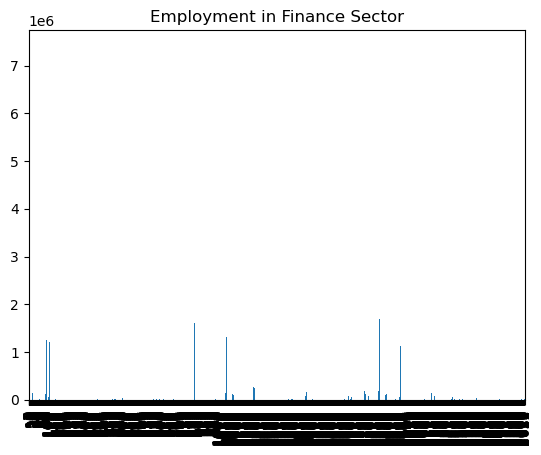

In [18]:
df["EMP"].plot(kind="bar")
plt.title("Employment in Finance Sector")
plt.show()


In [28]:
df.info()
df.head(20)
df.to_csv("/Users/michaelwalker/RDM_Datalab/Processed/ABS_NAICS_52_2022.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAICS2022_LABEL   2623 non-null   object
 1   FIRMPDEMP         2623 non-null   int64 
 2   RCPPDEMP          2623 non-null   int64 
 3   EMP               2623 non-null   int64 
 4   PAYANN            2623 non-null   int64 
 5   EMPSZFI           2623 non-null   object
 6   RCPSZFI           2623 non-null   object
 7   YIBSZFI           2623 non-null   object
 8   URSZFI            2623 non-null   object
 9   EMP_S             2623 non-null   object
 10  RCPPDEMP_S        2623 non-null   object
 11  PAYANN_S          2623 non-null   object
 12  SEX_LABEL         2623 non-null   object
 13  ETH_GROUP         2623 non-null   object
 14  ETH_GROUP_LABEL   2623 non-null   object
 15  RACE_GROUP        2623 non-null   object
 16  RACE_GROUP_LABEL  2623 non-null   object
 17  VET_GROUP     

In [26]:
# Convert employee count to numeric in case it's still a string
df["EMP"] = pd.to_numeric(df["EMP"], errors='coerce')

# Group by revenue size and ethnicity, then sum employees
grouped_df = df.groupby(["RCPSZFI", "ETH_GROUP_LABEL"], as_index=False)["EMP"].sum()
grouped_df = grouped_df.sort_values(by="EMP", ascending=False)

# Display result
print(grouped_df)

grouped_df2.to_csv("/Users/michaelwalker/RDM_Datalab/Processed/ABS_grouped_rev_eth.csv", index=False)

   RCPSZFI                     ETH_GROUP_LABEL       EMP
7      001                               Total  78045028
4      001                        Non-Hispanic  28394563
79     532                               Total  14759153
76     532                        Non-Hispanic   4503120
2      001                            Hispanic   1056304
..     ...                                 ...       ...
14     511                        Puerto Rican         0
38     521                        Puerto Rican         0
17     518       Equally Hispanic/non-Hispanic         0
19     518  Mexican, Mexican American, Chicano         0
10     511                            Hispanic         0

[80 rows x 3 columns]


In [16]:
grouped_df2.sample(29)

,ETH_GROUP_LABEL,EMP
33,Equally Hispanic/non-Hispanic,222
6,Puerto Rican,31738
52,Non-Hispanic,212974
44,Non-Hispanic,52380
66,Hispanic,32858
69,"Other Hispanic, Latino, or Spanish",6569
15,Total,101994
34,Hispanic,1537
59,"Mexican, Mexican American, Chicano",9969
70,Puerto Rican,1121


In [25]:
df.dtypes

NAICS2022_LABEL     object
FIRMPDEMP            int64
RCPPDEMP             int64
EMP                  int64
PAYANN               int64
EMPSZFI             object
RCPSZFI             object
YIBSZFI             object
URSZFI              object
EMP_S               object
RCPPDEMP_S          object
PAYANN_S            object
SEX_LABEL           object
ETH_GROUP           object
ETH_GROUP_LABEL     object
RACE_GROUP_LABEL    object
VET_GROUP_LABEL     object
NAICS2022           object
ETH_GROUP           object
us                  object
dtype: object

In [26]:
df.columns

Index(['NAICS2022_LABEL', 'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN', 'EMPSZFI',
       'RCPSZFI', 'YIBSZFI', 'URSZFI', 'EMP_S', 'RCPPDEMP_S', 'PAYANN_S',
       'SEX_LABEL', 'ETH_GROUP', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'NAICS2022', 'ETH_GROUP', 'us'],
      dtype='object')

In [27]:
df.duplicated().sum() 

np.int64(0)

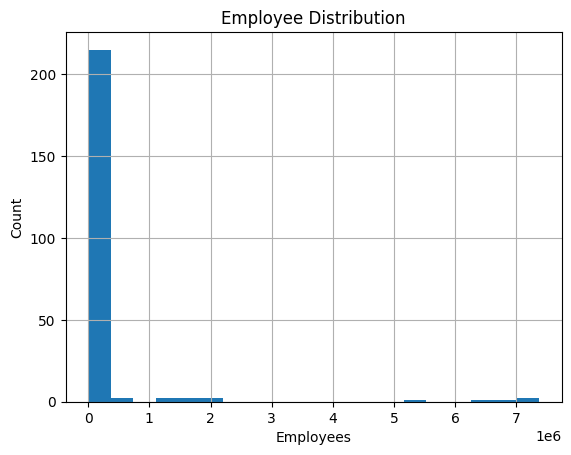

In [28]:
df["EMP"].hist(bins=20)
plt.title("Employee Distribution")
plt.xlabel("Employees")
plt.ylabel("Count")
plt.show()

In [29]:
df.groupby("RCPSZFI")["EMP"].sum()

RCPSZFI
001    40973232
511       38060
518        2110
519        8349
521       15200
522       40186
523      165217
525      273250
531      334558
532     8527504
Name: EMP, dtype: int64

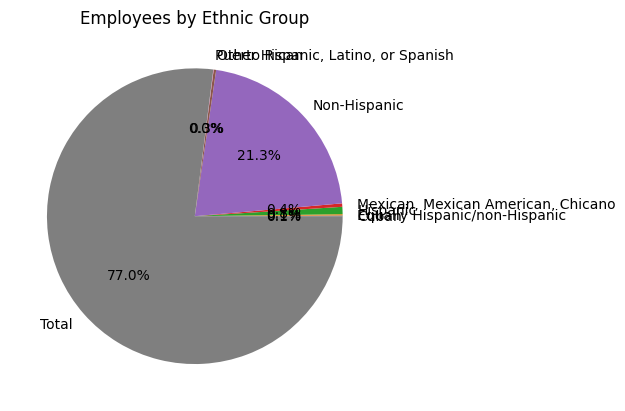

In [30]:
df.groupby("ETH_GROUP_LABEL")["EMP"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Employees by Ethnic Group")
plt.ylabel("")  # Hide y-label
plt.show()

In [31]:
df.to_csv("my_cleaned_data.csv", index=False)

In [32]:
# Load the BEA spreadsheet
bea_df = pd.read_csv("NAICS52_Value_Add_22.csv", skiprows=4)

# View the first few rows
print(bea_df.head())


                                                Line  \
0                                                 55   
1                                   Legend/Footnotes   
2  1. Consists of agriculture, forestry, fishing,...   
3  2. Consists of utilities; wholesale trade; ret...   
4  3. Consists of computer and electronic product...   

                      Unnamed: 1  Unnamed: 2  
0          Finance and insurance      1935.6  
1                            NaN         NaN  
2                            NaN         NaN  
3                            NaN         NaN  
4                            NaN         NaN  


In [34]:
# Recreate the bea_parsed_df from earlier parsed values
# Based on previously extracted data from the user's BEA CSV

bea_parsed_df = pd.DataFrame({
    "Line": [55],
    "Industry": ["Finance and insurance"],
    "Value_Added": [1935.6]  # in billions
})


In [35]:
# Add joinable key and metadata
bea_parsed_df["join_key"] = "52"  # NAICS code for Finance & Insurance
bea_parsed_df["year"] = 2022
bea_parsed_df["value_added_bil"] = bea_parsed_df["Value_Added"]

In [36]:
# Keep relevant columns
bea_clean = bea_parsed_df[["join_key", "Industry", "year", "value_added_bil"]]
bea_clean.columns = ["join_key", "industry", "year", "value_added_bil"]


In [38]:
# Save as CSV
output_path = "bea_value_added_finance_2022.csv"
bea_clean.to_csv(output_path, index=False)

In [39]:
output_path

'bea_value_added_finance_2022.csv'

In [6]:
!pip install sweetviz
!pip install numpy==1.24.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 1.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      Traceback (most recent call last):
        File "/opt/miniconda3/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "/opt/miniconda3/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/miniconda3/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 137, in get_requires_for_build_wheel
          backend = _build_backend()


In [7]:
import pandas as pd

df = pd.read_csv("2022.annual.singlefile.csv", low_memory=False)

                                             |      | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

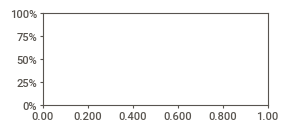

In [8]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("qcew_report.html")

In [1]:
import requests
import pandas as pd

In [2]:
# Base URL for 2022 ABS Characteristics of Businesses dataset
BASE_URL = "https://api.census.gov/data/2022/abscb"

# Variables to fetch
# FIRMPDEMP = number of employer firms
# RCPPDEMP  = receipts of employer firms
# EMP       = employment
# NAICS2022 = NAICS code (we want 52 for Finance & Insurance)
# STATE     = 06 for California
params = {
    "get": "NAICS2022,NAICS2022_LABEL,FIRMPDEMP,RCPPDEMP,EMP",
    "for": "state:06",
    "NAICS2022": "52"
}

# Make request
response = requests.get(BASE_URL, params=params)
response.raise_for_status()  # raise error if call failed

# Convert to DataFrame
data = response.json()
df = pd.DataFrame(data[1:], columns=data[0])

# Show result
print(df)

# Optional: Save to CSV
df.to_csv("/Users/michaelwalker/RDM_Datalab/ABS_CA_Finance_Insurance.csv", index=False)
print("Saved to ABS_CA_Finance_Insurance.csv")


  NAICS2022        NAICS2022_LABEL FIRMPDEMP   RCPPDEMP     EMP NAICS2022  \
0        52  Finance and insurance     28612  672560780  731755        52   

  state  
0    06  
Saved to ABS_CA_Finance_Insurance.csv


In [3]:
import requests, pandas as pd

BASE = "https://api.census.gov/data/2022/abscb"
# Pull state=06 (CA) for all NAICS; we'll filter to 3-digit under "52"
params = {
    "get": ",".join([
        "NAICS2022","NAICS2022_LABEL",
        "FIRMPDEMP","RCPPDEMP","EMP",   # firms, receipts, employment
        "INDLEVEL","GEOCOMP","NAME"
    ]),
    "for": "state:06"
}
resp = requests.get(BASE, params=params)
resp.raise_for_status()
cols = resp.json()[0]
df = pd.DataFrame(resp.json()[1:], columns=cols)

# Keep NAICS within 52 and exactly 3 digits (521, 522, 523, 524, 525...)
df_3d = (
    df[df["NAICS2022"].str.startswith("52", na=False)]
      .assign(ndigits=df["NAICS2022"].str.len())
)
df_3d = df_3d[df_3d["ndigits"]==3].drop(columns=["ndigits"])

# Convert numerics
for c in ["FIRMPDEMP","RCPPDEMP","EMP"]:
    df_3d[c] = pd.to_numeric(df_3d[c], errors="coerce")

print(df_3d[["NAICS2022","NAICS2022_LABEL","FIRMPDEMP","RCPPDEMP","EMP","NAME"]]
      .sort_values("NAICS2022"))


Empty DataFrame
Columns: [NAICS2022, NAICS2022_LABEL, FIRMPDEMP, RCPPDEMP, EMP, NAME]
Index: []


In [4]:
import requests, pandas as pd

BASE = "https://api.census.gov/data/2022/abscb"
params = {
    "get": ",".join([
        "NAICS2022","NAICS2022_LABEL",
        "FIRMPDEMP","RCPPDEMP","EMP",
        "GEO_ID","NAME"
    ]),
    # All counties in CA
    "for": "county:*",
    "in": "state:06",
    # Ask the API for NAICS 52 (top-level Finance & Insurance)
    "NAICS2022": "52"
}
resp = requests.get(BASE, params=params)
resp.raise_for_status()
cols = resp.json()[0]
df_cnty = pd.DataFrame(resp.json()[1:], columns=cols)

# Cast numerics
for c in ["FIRMPDEMP","RCPPDEMP","EMP"]:
    df_cnty[c] = pd.to_numeric(df_cnty[c], errors="coerce")

print(df_cnty[["NAME","FIRMPDEMP","RCPPDEMP","EMP"]]
      .sort_values("NAME"))


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
import requests
import pandas as pd

BASE = "https://api.census.gov/data/2022/abscb"

# --- PARAMETERS (edit these) ---
STATE_FIPS = "06"          # "06" = California
NAICS_PREFIX = "52"        # "52" for Finance & Insurance; set to None for all NAICS
GEO_FOR = "state:06"       # Use "state:06" (state total), or "county:*" with in="state:06", or "cbsa:*"
IN_CLAUSE = None           # If GEO_FOR is "county:*" or "ecplace:*", set e.g. "state:06"
# -------------------------------

vars_to_get = [
    "NAICS2022","NAICS2022_LABEL","INDLEVEL",
    "FIRMPDEMP","RCPPDEMP","EMP","PAYANN",
    "GEO_ID","NAME"
]

params = {
    "get": ",".join(vars_to_get),
    "for": GEO_FOR
}
if IN_CLAUSE:
    params["in"] = IN_CLAUSE

# (We pull wide, then filter locally)
resp = requests.get(BASE, params=params, timeout=60)
resp.raise_for_status()
cols = resp.json()[0]
df = pd.DataFrame(resp.json()[1:], columns=cols)

# Keep NAICS that start with the chosen prefix (if any)
if NAICS_PREFIX:
    df = df[df["NAICS2022"].str.startswith(NAICS_PREFIX, na=False)]

# Keep exactly 4-digit NAICS
df["naics_len"] = df["NAICS2022"].str.len()
df4 = df[df["naics_len"] == 4].drop(columns=["naics_len"])

# Make numerics numeric
for c in ["FIRMPDEMP","RCPPDEMP","EMP","PAYANN"]:
    df4[c] = pd.to_numeric(df4[c], errors="coerce")

# Tidy, sort, view
out = df4[["NAICS2022","NAICS2022_LABEL","FIRMPDEMP","RCPPDEMP","EMP","PAYANN","NAME"]].sort_values(["NAICS2022"])
print(out)

# Optional: save
out.to_csv("/Users/michaelwalker/RDM_Datalab/ABS_2022_CA_NAICS4_52.csv", index=False)
print("Saved to ABS_2022_CA_NAICS4_52.csv")


Empty DataFrame
Columns: [NAICS2022, NAICS2022_LABEL, FIRMPDEMP, RCPPDEMP, EMP, PAYANN, NAME]
Index: []
Saved to ABS_2022_CA_NAICS4_52.csv


In [6]:
import requests
import pandas as pd

BASE = "https://api.census.gov/data/2022/abscb"

# We request state totals, then filter locally to NAICS 52 at 4-digit level.
params = {
    "get": ",".join([
        "NAME","GEO_ID",
        "NAICS2022","NAICS2022_LABEL","INDLEVEL",
        "FIRMPDEMP","RCPPDEMP","EMP","PAYANN"
    ]),
    "for": "state:06",         # California
    "QDESC": "B01",            # question descriptor (Number of owners) -> works as a neutral stub
    "BUSCHAR": "A1"            # "All firms" (baseline totals)
}

r = requests.get(BASE, params=params, timeout=60)
r.raise_for_status()
cols = r.json()[0]
df = pd.DataFrame(r.json()[1:], columns=cols)

# Keep Finance & Insurance (52...) and exactly 4-digit industries
df = df[df["NAICS2022"].str.startswith("52", na=False)].copy()
df["naics_len"] = df["NAICS2022"].str.len()
df = df[df["naics_len"] == 4].drop(columns=["naics_len"])

# Cast numerics
for c in ["FIRMPDEMP","RCPPDEMP","EMP","PAYANN"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Tidy
out = df[["NAICS2022","NAICS2022_LABEL","FIRMPDEMP","RCPPDEMP","EMP","PAYANN","NAME"]].sort_values("NAICS2022")
print(out)

# Optional save
out.to_csv("/Users/michaelwalker/RDM_Datalab/ABS_2022_CA_NAICS4_52.csv", index=False)
print("Saved: ABS_2022_CA_NAICS4_52.csv")


Empty DataFrame
Columns: [NAICS2022, NAICS2022_LABEL, FIRMPDEMP, RCPPDEMP, EMP, PAYANN, NAME]
Index: []
Saved: ABS_2022_CA_NAICS4_52.csv


In [7]:
import requests, pandas as pd

url = "https://api.census.gov/data/2022/abscb"
params = {
    "get": "NAME,GEO_ID,NAICS2022,NAICS2022_LABEL,INDLEVEL,FIRMPDEMP,EMP,PAYANN,RCPPDEMP",
    "for": "county:075",   # San Francisco County
    "in": "state:06",      # California
    "BUSCHAR": "A1",       # All firms
    "QDESC": "B01",        # Required question descriptor
    "INDLEVEL": "2"        # 2-digit NAICS rows
}

r = requests.get(url, params=params)
r.raise_for_status()
hdr, *rows = r.json()
df = pd.DataFrame(rows, columns=hdr)

# Cast numbers
for c in ["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print(df[["NAICS2022","NAICS2022_LABEL","FIRMPDEMP","EMP","PAYANN","RCPPDEMP","NAME"]]
      .sort_values("NAICS2022"))

# Optional save
df.to_csv("/Users/michaelwalker/RDM_Datalab/ABS_2022_SF_NAICS2.csv", index=False)


  NAICS2022        NAICS2022_LABEL  FIRMPDEMP     EMP     PAYANN   RCPPDEMP  \
0        00  Total for all sectors      27858  903284  110238197  412731957   

                               NAME  
0  San Francisco County, California  


In [8]:
import requests, pandas as pd

url = "https://api.census.gov/data/2022/abscs"
params = {
    "get": "NAME,GEO_ID,NAICS2022,NAICS2022_LABEL,INDLEVEL,FIRMPDEMP,EMP,PAYANN,RCPPDEMP",
    "for": "county:075",      # San Francisco County
    "in": "state:06",         # California
    "INDLEVEL": "2"           # 2-digit NAICS rows
}
r = requests.get(url, params=params, timeout=60)
r.raise_for_status()
hdr, *rows = r.json()
df = pd.DataFrame(rows, columns=hdr)
for c in ["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
print(df.sort_values("NAICS2022")[[
    "NAICS2022","NAICS2022_LABEL","FIRMPDEMP","EMP","PAYANN","RCPPDEMP","NAME"
]])


   NAICS2022                                    NAICS2022_LABEL  FIRMPDEMP  \
0         00                              Total for all sectors      27858   
1         21      Mining, quarrying, and oil and gas extraction          0   
2         22                                          Utilities         18   
3         23                                       Construction       1914   
4      31-33                                      Manufacturing        584   
5         42                                    Wholesale trade        719   
6      44-45                                       Retail trade       1969   
7      48-49                     Transportation and warehousing        305   
8         51                                        Information       1827   
9         52                              Finance and insurance       1417   
10        53                 Real estate and rental and leasing       1943   
11        54   Professional, scientific, and technical services 

In [9]:
import requests, pandas as pd

URL = "https://api.census.gov/data/2022/abscs"
params = {
    "get": "NAME,GEO_ID,NAICS2022,NAICS2022_LABEL,INDLEVEL,FIRMPDEMP,EMP,PAYANN,RCPPDEMP",
    "for": "county:*",
    "in": "state:06",   # California
    "INDLEVEL": "2"     # 2-digit NAICS
}

r = requests.get(URL, params=params, timeout=60)
r.raise_for_status()
hdr, *rows = r.json()
df = pd.DataFrame(rows, columns=hdr)

# Cast numerics
for c in ["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Nice ordering
df = df.sort_values(["state","county","NAICS2022"]).reset_index(drop=True)

print(df.head())  # preview
df.to_csv("ABS_2022_CA_allcounties_NAICS2.csv", index=False)
print("Saved: ABS_2022_CA_allcounties_NAICS2.csv")


                         NAME          GEO_ID NAICS2022  \
0  Alameda County, California  0500000US06001        00   
1  Alameda County, California  0500000US06001        11   
2  Alameda County, California  0500000US06001        21   
3  Alameda County, California  0500000US06001        22   
4  Alameda County, California  0500000US06001        23   

                                 NAICS2022_LABEL INDLEVEL  FIRMPDEMP      EMP  \
0                          Total for all sectors        2      33444  1232378   
1     Agriculture, forestry, fishing and hunting        2         25       99   
2  Mining, quarrying, and oil and gas extraction        2         12      240   
3                                      Utilities        2         16      300   
4                                   Construction        2       2979    48569   

     PAYANN   RCPPDEMP INDLEVEL state county  
0  89536503  328624659        2    06    001  
1      9839      55222        2    06    001  
2     19953     1

# Ensure uniqueness in dataframe by expected key

In [14]:
assert df.duplicated(subset=["state","county","NAICS2022"]).sum() == 0
print(df.duplicated(subset=["state","county","NAICS2022"]).sum())

0


## Handy derived Metrics

In [11]:
import pandas as pd

num = ["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]
for c in num:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["avg_wage_per_emp"]      = (df["PAYANN"]*1000) / df["EMP"]         # $ per employee
df["receipts_per_firm"]     = (df["RCPPDEMP"]*1000) / df["FIRMPDEMP"] # $ per firm
df["payroll_to_receipts"]   = df["PAYANN"] / df["RCPPDEMP"]           # ratio (both in $1k)


In [12]:
print(df["avg_wage_per_emp"])

0        72653.441558
1        99383.838384
2        83137.500000
3       125126.666667
4        84655.315119
            ...      
1139     71244.262295
1140              NaN
1141     31597.402597
1142     52750.000000
1143              NaN
Name: avg_wage_per_emp, Length: 1144, dtype: float64


## Make Primary Key Explicit

In [15]:
df = df.copy()
df["state"]  = df["state"].astype(str).str.zfill(2)
df["county"] = df["county"].astype(str).str.zfill(3)
df.set_index(["state","county","NAICS2022"], inplace=True)


# Enforce numeric types

In [17]:
for c in ["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")


## DQ Checks

In [18]:
# No negatives
assert (df[["FIRMPDEMP","EMP","PAYANN","RCPPDEMP"]] >= 0).all().all()

In [19]:
# Units sanity (optional ratios)
df["avg_wage_per_emp"]    = (df["PAYANN"]*1000) / df["EMP"]
df["receipts_per_firm"]   = (df["RCPPDEMP"]*1000) / df["FIRMPDEMP"]
df["payroll_to_receipts"] = df["PAYANN"] / df["RCPPDEMP"]

## Pivot for Analysis

In [21]:
firms_by_naics = (df.reset_index()
                    .pivot_table(index=["state","county"],
                                 columns="NAICS2022",
                                 values="FIRMPDEMP",
                                 aggfunc="first")
                    .sort_index())


In [22]:
print(firms_by_naics)

NAICS2022           00     11     21     22       23   31-33       42  \
state county                                                            
06    001      33444.0   25.0   12.0   16.0   2979.0  1671.0   2270.0   
      003          0.0    NaN    NaN    0.0      NaN     NaN      NaN   
      005        724.0    NaN    9.0    0.0      0.0    32.0      0.0   
      007       3819.0    7.0    0.0   15.0    460.0   155.0      0.0   
      009        954.0    0.0    0.0    0.0    186.0    44.0      0.0   
      011        314.0    0.0    NaN    4.0      0.0     9.0     10.0   
      013      20222.0    7.0   15.0   23.0   2710.0   448.0    736.0   
      015        326.0    0.0    NaN    0.0      0.0     5.0      5.0   
      017       4541.0    0.0    0.0    7.0    691.0   142.0      0.0   
      019      14747.0    0.0    8.0   28.0   1660.0   538.0    931.0   
      021        347.0    NaN    0.0    4.0      0.0     0.0      7.0   
      023       2518.0    0.0    NaN    3.0    245.

## Add row level metrics to dataframe

In [23]:
import numpy as np
import pandas as pd

def add_abs_derived_metrics(df,
                            firms_col="FIRMPDEMP",
                            emp_col="EMP",
                            pay_k_col="PAYANN",      # $ in thousands
                            rcpts_k_col="RCPPDEMP",  # $ in thousands
                            prefix=""):
    """
    Adds row-level derived metrics to ABS dataframe:
      - avg_wage_per_emp_dollars
      - receipts_per_firm_dollars
      - payroll_to_receipts (ratio)
      - receipts_per_emp_dollars
      - firms_per_1k_emp
    Returns a new dataframe (does not modify in place).
    """

    out = df.copy()

    # 1) Ensure numeric types
    for c in [firms_col, emp_col, pay_k_col, rcpts_k_col]:
        if c in out.columns:
            out[c] = pd.to_numeric(out[c], errors="coerce")

    # 2) Convert $1,000s → $ for dollar-denominated metrics
    pay_dollars   = out[pay_k_col]   * 1000.0
    rcpts_dollars = out[rcpts_k_col] * 1000.0

    # Safe division helpers
    def sdiv(num, den):
        return np.where(den > 0, num / den, np.nan)

    # 3) Derived metrics (row-level)
    out[f"{prefix}avg_wage_per_emp_dollars"]  = sdiv(pay_dollars, out[emp_col])
    out[f"{prefix}receipts_per_firm_dollars"] = sdiv(rcpts_dollars, out[firms_col])
    out[f"{prefix}payroll_to_receipts"]       = sdiv(out[pay_k_col], out[rcpts_k_col])  # both in $1k → ratio
    out[f"{prefix}receipts_per_emp_dollars"]  = sdiv(rcpts_dollars, out[emp_col])
    out[f"{prefix}firms_per_1k_emp"]          = sdiv(out[firms_col] * 1000.0, out[emp_col])

    # Optional: tidy rounding (comment out if you prefer raw)
    round2 = [f"{prefix}avg_wage_per_emp_dollars",
              f"{prefix}receipts_per_firm_dollars",
              f"{prefix}receipts_per_emp_dollars"]
    out[round2] = out[round2].round(2)
    out[f"{prefix}payroll_to_receipts"] = out[f"{prefix}payroll_to_receipts"].round(4)
    out[f"{prefix}firms_per_1k_emp"]    = out[f"{prefix}firms_per_1k_emp"].round(3)

    return out

# --- Use it on your existing df ---
df = add_abs_derived_metrics(df)


In [24]:
df.head(20)

NAME          GEO_ID  \
state county NAICS2022                                               
06    001    00         Alameda County, California  0500000US06001   
             11         Alameda County, California  0500000US06001   
             21         Alameda County, California  0500000US06001   
             22         Alameda County, California  0500000US06001   
             23         Alameda County, California  0500000US06001   
             31-33      Alameda County, California  0500000US06001   
             42         Alameda County, California  0500000US06001   
             44-45      Alameda County, California  0500000US06001   
             48-49      Alameda County, California  0500000US06001   
             51         Alameda County, California  0500000US06001   
             52         Alameda County, California  0500000US06001   
             53         Alameda County, California  0500000US06001   
             54         Alameda County, California  0500000US06001   
             55         Alameda County, California  0500000US06001   
             56         Alameda County, California  0500000US06001   
             61         Alameda County, California  0500000US06001   
             62         Alameda County, California  0500000US06001   
             71         Alameda County, California  0500000US06001   
             72         Alameda County, California  0500000US06001   
             81         Alameda County, California  0500000US06001   

                                                          NAICS2022_LABEL  \
state county NAICS2022                                                      
06    001    00                                     Total for all sectors   
             11                Agriculture, forestry, fishing and hunting   
             21             Mining, quarrying, and oil and gas extraction   
             22                                                 Utilities   
             23                                              Construction   
             31-33                                          Manufacturing   
             42                                           Wholesale trade   
             44-45                                           Retail trade   
             48-49                         Transportation and warehousing   
             51                                               Information   
             52                                     Finance and insurance   
             53                        Real estate and rental and leasing   
             54          Professional, scientific, and technical services   
             55                   Management of companies and enterprises   
             56         Administrative and support and waste managemen...   
             61                                      Educational services   
             62                         Health care and social assistance   
             71                       Arts, entertainment, and recreation   
             72                           Accommodation and food services   
             81             Other services (except public administration)   

                       INDLEVEL  FIRMPDEMP      EMP    PAYANN   RCPPDEMP  \
state county NAICS2022                                                     
06    001    00               2      33444  1232378  89536503  328624659   
             11               2         25       99      9839      55222   
             21               2         12      240     19953     111883   
             22               2         16      300     37538     542713   
             23               2       2979    48569   4111624   17096090   
             31-33            2       1671    85041   8056926   60343288   
             42               2       2270    49319   4879054   78329501   
             44-45            2       3218    91151   4027804   37236089   
             48-49            2       1184    3055